In [16]:
%matplotlib inline

# Import required modules.
from numpy import *               
from numpy.linalg import solve, norm        # To solve Ax=b
from matplotlib.pyplot import *   

# For plotting. 
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 16}
rcParams.update(newparams)

1] a)
h = 2.00e+00,   S(h) = 0.78346746,   e(h) = 4.77e-02
h = 1.00e+00,   S(h) = 0.73913060,   e(h) = 3.37e-03
h = 5.00e-01,   S(h) = 0.73597650,   e(h) = 2.18e-04
h = 2.50e-01,   S(h) = 0.73577259,   e(h) = 1.37e-05
h = 1.25e-01,   S(h) = 0.73575974,   e(h) = 8.59e-07
h = 6.25e-02,   S(h) = 0.73575894,   e(h) = 5.37e-08
h = 3.12e-02,   S(h) = 0.73575889,   e(h) = 3.36e-09
h = 1.56e-02,   S(h) = 0.73575888,   e(h) = 2.10e-10
h = 7.81e-03,   S(h) = 0.73575888,   e(h) = 1.31e-11
h = 3.91e-03,   S(h) = 0.73575888,   e(h) = 8.19e-13

The order p and the error constant C
h = 1.00e+00,  p = 3.95,  C = 0.0034
h = 5.00e-01,  p = 3.99,  C = 0.0035
h = 2.50e-01,  p = 4.00,  C = 0.0035
h = 1.25e-01,  p = 4.00,  C = 0.0035
h = 6.25e-02,  p = 4.00,  C = 0.0035
h = 3.12e-02,  p = 4.00,  C = 0.0035
h = 1.56e-02,  p = 4.00,  C = 0.0035
h = 7.81e-03,  p = 4.00,  C = 0.0035


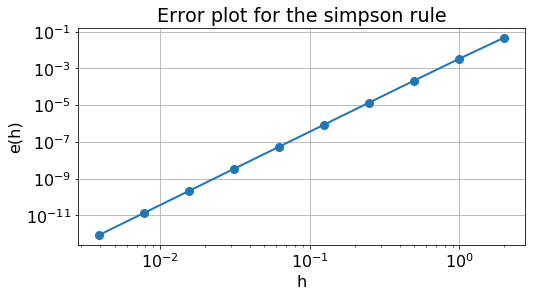

In [17]:
# Find the order and the error plot for the simpson rule
print("1] a)")

def simpson(f, a, b, m=10):
# Find an approximation to an integral by the composite Simpson's method:
# Input:  
#   f:    integrand
#   a, b: integration interval
#   m:    number of subintervals
# Output: The approximation to the integral
    n = 2*m
    x_noder = linspace(a, b, n+1)       # equidistributed nodes from a to b 
    h = (b-a)/n                         # stepsize
    S1 = f(x_noder[0]) + f(x_noder[n])  # S1 = f(x_0)+f(x_n)
    S2 = sum(f(x_noder[1:n:2]))         # S2 = f(x_1)+f(x_3)+...+f(x_m)
    S3 = sum(f(x_noder[2:n-1:2]))       # S3 = f(x_2)+f(x_4)+...+f(x_{m-1})
    S = h*(S1 + 4*S2 + 2*S3)/3
    return S

def f(x):                       # Define the function
    return x * exp(x)

a, b = -1, 1                    # integration interval
exact = 2/exp(1)

# Find an numerical approximation for different values of h. 
# Store the stepsize h and the error
n = 1                           # initial stepsize, h=(b-a)/n 
h = (b-a)/n
steps = []                      # arrays to store stepsizes and errors
errors = []
Nmax = 10
for k in range(Nmax):
    numres = simpson(f, a, b, n)    # Numerical approximation
    eh = abs(exact - numres)            # Error e(h)
    print('h = {:8.2e},   S(h) = {:10.8f},   e(h) = {:8.2e}'.format(h, numres, eh))
    steps.append(h)                     # Append the step to the array
    errors.append(eh)                   # Append the error to the array
    n = 2*n                             # Reduce the stepsize with a factor 2
    h = (b-a)/n

# Find the order and the error constant
print('\nThe order p and the error constant C')
for k in range(1, Nmax-1):
    p = log(errors[k+1]/errors[k])/log(steps[k+1]/steps[k])
    C = errors[k+1]/steps[k+1]**p
    print('h = {:8.2e},  p = {:4.2f},  C = {:6.4f}'.format(steps[k], p, C))

# Make an error plot
clf()
loglog(steps, errors, 'o-')
xlabel('h')
ylabel('e(h)')
title('Error plot for the simpson rule')
grid('True')

1] b)
h = 2.00e+00,   S(h) = 0.73575888,   e(h) = 8.19e-13
h = 1.00e+00,   S(h) = 0.73575888,   e(h) = 8.19e-13
h = 5.00e-01,   S(h) = 0.73575888,   e(h) = 8.19e-13
h = 2.50e-01,   S(h) = 0.73575888,   e(h) = 8.19e-13
h = 1.25e-01,   S(h) = 0.73575888,   e(h) = 8.19e-13
h = 6.25e-02,   S(h) = 0.73575888,   e(h) = 8.19e-13
h = 3.12e-02,   S(h) = 0.73575888,   e(h) = 8.19e-13
h = 1.56e-02,   S(h) = 0.73575888,   e(h) = 8.19e-13
h = 7.81e-03,   S(h) = 0.73575888,   e(h) = 8.19e-13
h = 3.91e-03,   S(h) = 0.73575888,   e(h) = 8.19e-13

The order p and the error constant C
h = 1.00e+00,  p = -0.00,  C = 0.0000
h = 5.00e-01,  p = -0.00,  C = 0.0000
h = 2.50e-01,  p = -0.00,  C = 0.0000
h = 1.25e-01,  p = -0.00,  C = 0.0000
h = 6.25e-02,  p = -0.00,  C = 0.0000
h = 3.12e-02,  p = -0.00,  C = 0.0000
h = 1.56e-02,  p = -0.00,  C = 0.0000
h = 7.81e-03,  p = -0.00,  C = 0.0000


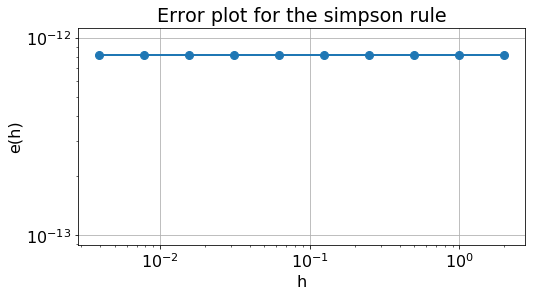

In [18]:
print("1] b)")

def f1(x):                       # Define the function
    return sqrt(1-x**2) * exp(x)

a1, b1 = -1, 1                    # integration interval
exact1 = 1.7754996892121809469

# Find an numerical approximation for different values of h. 
# Store the stepsize h and the error
n1 = 1                           # initial stepsize, h=(b-a) 
h1 = (b1-a1)/n1
steps1 = []                      # arrays to store stepsizes and errors
errors1 = []
Nmax1 = 10
for k in range(Nmax1):
    numres1 = simpson(f, a, b, n)    # Numerical approximation
    eh1 = abs(exact - numres)            # Error e(h)
    print('h = {:8.2e},   S(h) = {:10.8f},   e(h) = {:8.2e}'.format(h1, numres1, eh1))
    steps1.append(h1)                     # Append the step to the array
    errors1.append(eh1)                   # Append the error to the array
    n1 = 2*n1                             # Reduce the stepsize with a factor 2
    h1 = (b1-a1)/n1

# Find the order and the error constant
print('\nThe order p and the error constant C')
for k1 in range(1, Nmax1-1):
    p1 = log(errors1[k1+1]/errors1[k1])/log(steps1[k1+1]/steps1[k1])
    C1 = errors1[k1+1]/steps1[k1+1]**p1
    print('h = {:8.2e},  p = {:4.2f},  C = {:6.4f}'.format(steps1[k1], p1, C1))

# Make an error plot
clf()
loglog(steps1, errors1, 'o-')
xlabel('h')
ylabel('e(h)')
title('Error plot for the simpson rule')
grid('True')

In [19]:
def newton(f, df, x0, tol=1.e-8, max_iter=30):
    # Solve f(x)=0 by Newtons method
    # The output of each iteration is printed
    # Input:
    #   f, df:   The function f and its derivate f'.
    #   x0:  Initial values
    #   tol: The tolerance
    # Output:
    #   The root and the number of iterations
    x = x0
    print('k ={:3d}, x = {:18.15f}, f(x) = {:10.3e}'.format(0, x, f(x)))
    for k in range(max_iter):
        fx = f(x)
        if abs(fx) < tol:           # Accept the solution 
            break 
        x = x - fx/df(x)            # Newton-iteration
        print('k ={:3d}, x = {:18.15f}, f(x) = {:10.3e}'.format(k+1, x, f(x)))
    return x, k+1

In [20]:
# 3] a)

def der(x):                  # The derivative f'
    return exp(x) + 2*x - 1

x0 = 1.3                      # Starting value
x3, nit = newton(t, der, x0, tol=1.e-14, max_iter=30)  # Apply Newton
print('\n\nResult:\nx={}, number of iterations={}'.format(x3, nit))

NameError: name 't' is not defined

In [21]:
def fixpoint(g, x0, tol=1.e-8, max_iter=30):
    # Solve x=g(x) by fixed point iterations
    # The output of each iteration is printed
    # Input:
    #   g:   The function g(x)
    #   x0:  Initial values
    #   tol: The tolerance
    # Output:
    #   The root and the number of iterations
    x = x0
    print('k ={:3d}, x = {:14.10f}'.format(0, x))  
    for k in range(max_iter):        
        x_old = x                        # Store old values for error estimation 
        x = g(x)                         # The iteration
        err = abs(x-x_old)               # Error estimate
        print('k ={:3d}, x = {:14.10f}'.format(k+1, x))
        if err < tol:          # The solution is accepted 
            break
    return x, k+1

In [22]:
# 3] b)

def i(x):
    return log(4 + x + x**2)
    
def ii(x):
    return sqrt(-exp(x) + x + 4)

def iii(x):
    return exp(x) + x**2 - 4

print('log(4 + x + x**2): (kun denne konvergerer)')
x4, nit = fixpoint(i, x0=1.5, tol=1.e-6, max_iter=10)
print('\nResultat:\nx = {}, antall iterasjoner={}\n\nsqrt(-exp(x) + x + 4):'.format(x4, nit))

x5, nit = fixpoint(ii, x0=1.5, tol=1.e-6, max_iter=10)
print('\n\nResultat:\nx = {}, antall iterasjoner={}\n\nexp(x) + x**2 - 4:'.format(x5, nit))

x6, nit = fixpoint(iii, x0=1.5, tol=1.e-6, max_iter=10)
print('\n\nResultat:\nx = {}, antall iterasjoner={}'.format(x6, nit))

log(4 + x + x**2): (kun denne konvergerer)
k =  0, x =   1.5000000000
k =  1, x =   2.0476928434
k =  2, x =   2.3263737678
k =  3, x =   2.4628645542
k =  4, x =   2.5280113463
k =  5, x =   2.5586876951
k =  6, x =   2.5730373624
k =  7, x =   2.5797287280
k =  8, x =   2.5828443623
k =  9, x =   2.5842940641
k = 10, x =   2.5849683923

Resultat:
x = 2.58496839225596, antall iterasjoner=10

sqrt(-exp(x) + x + 4):
k =  0, x =   1.5000000000
k =  1, x =   1.0091139329
k =  2, x =   1.5053054929
k =  3, x =   0.9998878264
k =  4, x =   1.5105995169
k =  5, x =   0.9905322092
k =  6, x =   1.5158710552
k =  7, x =   0.9810634053
k =  8, x =   1.5211088914
k =  9, x =   0.9714992449
k = 10, x =   1.5263017049


Resultat:
x = 1.5263017049440268, antall iterasjoner=10

exp(x) + x**2 - 4:
k =  0, x =   1.5000000000
k =  1, x =   2.7316890703
k =  2, x =  18.8209324059
k =  3, x = 149220368.2729534507
k =  4, x =            inf
k =  5, x =            inf
k =  6, x =            inf
k =  7, x =

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


In [23]:
def newton_system(f, jac, x0, tol = 1.e-10, max_iter=20):
    x = x0
    print('k ={:3d}, x = '.format(0), x)
    for k in range(max_iter):
        fx = f(x)
        if norm(fx, inf) < tol:          # The solution is accepted. 
            break
        Jx = jac(x)
        delta = solve(Jx, -fx) 
        x = x + delta            
        print('k ={:3d}, x = '.format(k+1), x)
    return x, k

In [26]:
# 5] b)

# The vector valued function. Notice the indexing. 
def f(x):               
    y = array([x[0]**2 - x[1]**2 - 4, 
               x[0]*x[1] - 1])
    return y

# The Jacobian
def jac(x):
    J = array([[2*x[0], 2*x[1]],
         [x[1],    x[0]]])
    return J

x0 = array([2.0, 0.0])          # Starting values
max_iter = 20

print("5] b):")
x, nit = newton_system(f, jac, x0, tol = 1.e-12, max_iter = max_iter)  # Apply Newton's method
  
if nit == max_iter:
    printf('Warning: Convergence har not been achieved')

5] b):
k =  0, x =  [ 2.  0.]
k =  1, x =  [ 2.   0.5]
k =  2, x =  [ 2.06666667  0.48333333]
k =  3, x =  [ 2.05693613  0.48614666]
k =  4, x =  [ 2.05831082  0.48583507]
k =  5, x =  [ 2.05815443  0.48587219]
k =  6, x =  [ 2.05817298  0.48586781]
k =  7, x =  [ 2.0581708   0.48586833]
k =  8, x =  [ 2.05817105  0.48586827]
k =  9, x =  [ 2.05817102  0.48586827]
k = 10, x =  [ 2.05817103  0.48586827]
k = 11, x =  [ 2.05817103  0.48586827]
k = 12, x =  [ 2.05817103  0.48586827]
k = 13, x =  [ 2.05817103  0.48586827]
k = 14, x =  [ 2.05817103  0.48586827]


In [29]:
# 5] c)

# The vector valued function. Notice the indexing. 
def f(x):               
    y = array([x[0]**2 + x[1]**2 - 4, 
               x[0]*x[1] - 1])
    return y

# The Jacobian
def jac(x):
    J = array([[2*x[0], 2*x[1]],
         [x[1],    x[0]]])
    return J

x0 = array([2.0, 0.0])          # Starting values
max_iter = 20

print("5] c):")
x, nit = newton_system(f, jac, x0, tol = 1.e-12, max_iter = max_iter)  # Apply Newton's method
  
if nit == max_iter:
    printf('Warning: Convergence har not been achieved')
    
print("The method still converges")

5] c):
k =  0, x =  [ 2.  0.]
k =  1, x =  [ 2.   0.5]
k =  2, x =  [ 1.93333333  0.51666667]
k =  3, x =  [ 1.93185274  0.51763705]
k =  4, x =  [ 1.93185165  0.51763809]
k =  5, x =  [ 1.93185165  0.51763809]
The method still converges
